# Курсовая работа #

## Часть 1. Метод неопределенных коэффициэнтов

Возьмем данные из exel таблицы с помощью библиотеки pandas.

In [8]:
import pandas as pd
data = pd.read_excel('https://github.com/ivanyarigin/geo23/raw/main/210_1.xlsx', sheet_name = 'Ярыгин')
x = data.iloc[:,0].tolist()
y = data.iloc[:,1].tolist()
print(x)
print(y)

[0, 8, 10, 20, 21, 30, 43, 50, 65, 75, 87, 100, 125, 130, 150, 172, 200, 250, 254, 300, 341, 400, 500, 514, 600, 700, 747, 800, 900, 1000, 1100, 1200, 1212]
[12.5, 12.66, 12.66, 12.64, 12.64, 12.64, 12.64, 12.64, 12.63, 12.64, 12.66, 12.52, 11.94, 11.77, 10.84, 9.73, 8.9, 7.75, 8.16, 7.03, 6.76, 6.07, 5.21, 5.12, 4.71, 4.38, 4.28, 4.14, 3.89, 3.63, 3.37, 3.11, 3.08]


Будем искать апроксимирующую функцию в виде y = ax + b

In [14]:
import numpy as np
def MNK(x, y):
    c1 = np.sum(np.multiply(x, x))
    c2 = np.sum(x)
    c3 = np.sum(np.multiply(x, y))
    d1 = c2
    d2 = len(x)
    d3 = np.sum(y)
    A = np.array([[c1, c2], [d1, d2]])
    B = np.array([[c3],[d3]])
    E = np.linalg.solve(A, B)
    a = E[0,0]
    b = E[1,0]
    return(a, b)
a, b = MNK(x, y)

Строим график полученной функции и отмечаем иходные точки

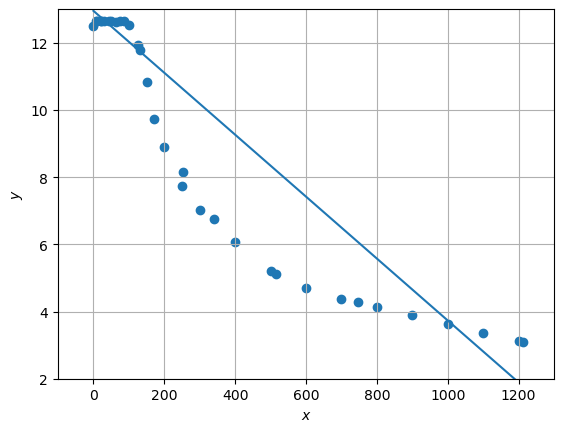

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-100, 1300])
ax.set_ylim([2, 13])
c = np.arange(-100, 1200, 1)
plt.scatter(x, y)
plt.plot(a*c+b)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

## Часть 2. Интерполяционный многочлен Лагранжа

Также импортируем данные из exel таблицы с помощью библиотеки pandas

In [18]:
import pandas as pd
df = pd.read_excel('https://github.com/ivanyarigin/geo23/raw/main/210_1.xlsx', sheet_name = 'Lagrange')
df = df.dropna()
x = df.iloc[:,0].tolist()
y = df.iloc[:,1].tolist()
print(x)

[233.0, 232.5, 232.8, 234.1, 234.0, 233.0, 231.0, 228.5, 220.1, 218.6, 211.2, 204.5, 198.2, 178.3, 176.7, 173.6, 166.8, 158.9, 155.7, 139.6, 135.4, 122.4, 114.0, 113.9, 107.8, 101.5, 95.4]


Напишем функцию, строящую интеполяционный многочлен Лагранжа.

In [19]:
def create_basic_polynomial(x, i):
    def basic_polynomial(X):
        divider = 1
        result = 1
        for j in range(len(x)):
            if j != i:
                result *= (X-x[j])
                divider *= (x[i]-x[j])
            if divider == 0:
                divider = 1
        return result/divider
    return basic_polynomial

def create_Lagrange_polynomial(x, y):
    basic_polynomials = []
    for i in range(len(x)):
        basic_polynomials.append(create_basic_polynomial(x, i))

    def lagrange_polynomial(X):
        result = 0
        for i in range(len(y)):
            result += y[i]*basic_polynomials[i](X)
        return result
    return lagrange_polynomial
lag_pol = create_Lagrange_polynomial(x, y)

С помощью библиотеки matplotlib.pyplot изобразим полученный полином Лагранжа на графике.

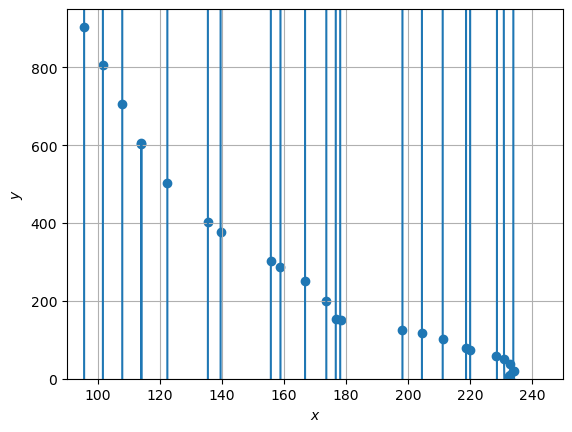

In [20]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([90, 250])
ax.set_ylim([0, 950])
plt.scatter(x, y) 
c = np.arange(0, 260, 1)
plt.plot(lag_pol(c))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

## Вывод

У phyton существует большое количество библиотек, которые позволяют решать различные задачи. В этой работе мы использовали библиотеки matplotlib.pyplot, pandas и numpy, чтобы аппроксимировать линейной функцией, или интерполировать полиномом Лагранжа заданое множество точек.